In [1]:
import pandas as pd
from constants import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec


In [2]:
fname = "data/ev_sales/BEV-PHEV-HEV-FCEV Sales By State for 2011-2021-EVAdoption.xlsx"
sample_df = pd.read_excel(fname, sheet_name = '2013')

In [3]:
start_year = 2013
end_year = 2019
read_cols = ["State", 'FCEV Sales', "FCEV Market Share", 'BEV Sales', "BEV Market Share", 'PHEV Sales', "PHEV Market Share"]
df = pd.DataFrame(columns=read_cols)
for year in range(start_year, end_year):
    filter_cols = ["{} {}".format(year, j) if i>0 else j for i, j in enumerate(read_cols)]
    t_df = pd.read_excel(fname, sheet_name="{}".format(year), usecols=filter_cols)
    t_df.columns = read_cols
    t_df['year'] = str(year)
    df = df.append(t_df)

C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_36972\2372781552.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_36972\2372781552.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_36972\2372781552.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_36972\2372781552.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_36972\237278155

In [4]:
df['PHEV Market Share']

0     0.0005
1      0.001
2     0.0017
3     0.0006
4     0.0108
       ...  
47    0.0122
48    0.0015
49    0.0032
50    0.0012
51    0.0074
Name: PHEV Market Share, Length: 312, dtype: object

In [5]:
df['total'] = (df['PHEV Sales'])/df['PHEV Market Share'] 
df['ev_sales'] = df['FCEV Sales'] + df['BEV Sales'] + df['PHEV Sales']
df['nonev_sales'] = df['total'] - df['ev_sales']

In [8]:
df['State'] = df['State'].replace("District of Columbia", "District Of Columbia")

In [9]:
df

,State,FCEV Sales,FCEV Market Share,BEV Sales,BEV Market Share,PHEV Sales,PHEV Market Share,year,total,ev_sales,nonev_sales
0,Alabama,0,0,77,0.0004,99,0.0005,2013,198000.0,176,197824.0
1,Alaska,0,0,17,0.0007,26,0.001,2013,26000.0,43,25957.0
2,Arizona,0,0,705,0.0023,544,0.0017,2013,320000.0,1249,318751.0
3,Arkansas,0,0,24,0.0002,74,0.0006,2013,123333.333333,98,123235.333333
4,California,19,0,20943,0.0129,17512,0.0108,2013,1621481.481481,38474,1583007.481481
...,...,...,...,...,...,...,...,...,...,...,...
47,Washington,0,0.0,9039,0.0306,3611,0.0122,2018,295983.606557,12650,283333.606557
48,West Virginia,0,0.0,95,0.0012,123,0.0015,2018,82000.0,218,81782.0
49,Wisconsin,0,0.0,1168,0.0047,788,0.0032,2018,246250.0,1956,244294.0
50,Wyoming,0,0.0,61,0.0023,31,0.0012,2018,25833.333333,92,25741.333333


In [16]:
epa_region = pd.read_csv("data/states_and_counties.csv")
epa_region = epa_region[['State Name','State Code', "EPA Region"]]
epa_region = epa_region[epa_region['State Code'] != 'CC']
epa_region['State Code'] = epa_region['State Code'].apply(int)
epa_region = epa_region.drop_duplicates(['State Code'], keep='first')
mdf = df.merge(epa_region, left_on="State", right_on="State Name", how='left')

In [17]:
mdf = mdf.groupby(['State Code'])[['nonev_sales', 'total', 'year']].sum().reset_index()

In [18]:
mdf = mdf[~mdf['State Code'].isin(EXCLUDE_STATES)]
mdf_carb = mdf[mdf['State Code'].isin(ZEV_STATES)]
mdf_noncarb = mdf[~mdf['State Code'].isin(ZEV_STATES)]
# mdf_noncarb = mdf_noncarb[mdf_noncarb['State']!='Total US']

In [19]:
(mdf_carb['nonev_sales'].sum()*100)/mdf_carb['total'].sum(), (mdf_noncarb['nonev_sales'].sum()*100)/mdf_noncarb['total'].sum()

(97.67857906590729, 99.55229276195286)

In [20]:
mdf

,State Code,nonev_sales,total,year
0,1.0,1.208957e+06,1.211130e+06,201320142015201620172018
1,2.0,1.496830e+05,1.501710e+05,201320142015201620172018
3,5.0,7.415650e+05,7.426190e+05,201320142015201620172018
4,6.0,1.069843e+07,1.118394e+07,201320142015201620172018
6,9.0,1.000774e+06,1.010964e+06,201320142015201620172018
9,12.0,7.379581e+06,7.417493e+06,201320142015201620172018
10,13.0,2.735969e+06,2.768718e+06,201320142015201620172018
11,15.0,4.541002e+05,4.627032e+05,201320142015201620172018
12,16.0,3.220765e+05,3.234335e+05,201320142015201620172018
13,17.0,3.742219e+06,3.762757e+06,201320142015201620172018


In [15]:
plot_df_carb = mdf_carb.groupby(['year'])[["nonev_sales", "total"]].sum().reset_index()
plot_df_noncarb = mdf_noncarb.groupby(['year'])[["nonev_sales", "total"]].sum().reset_index()

KeyError: 'year'

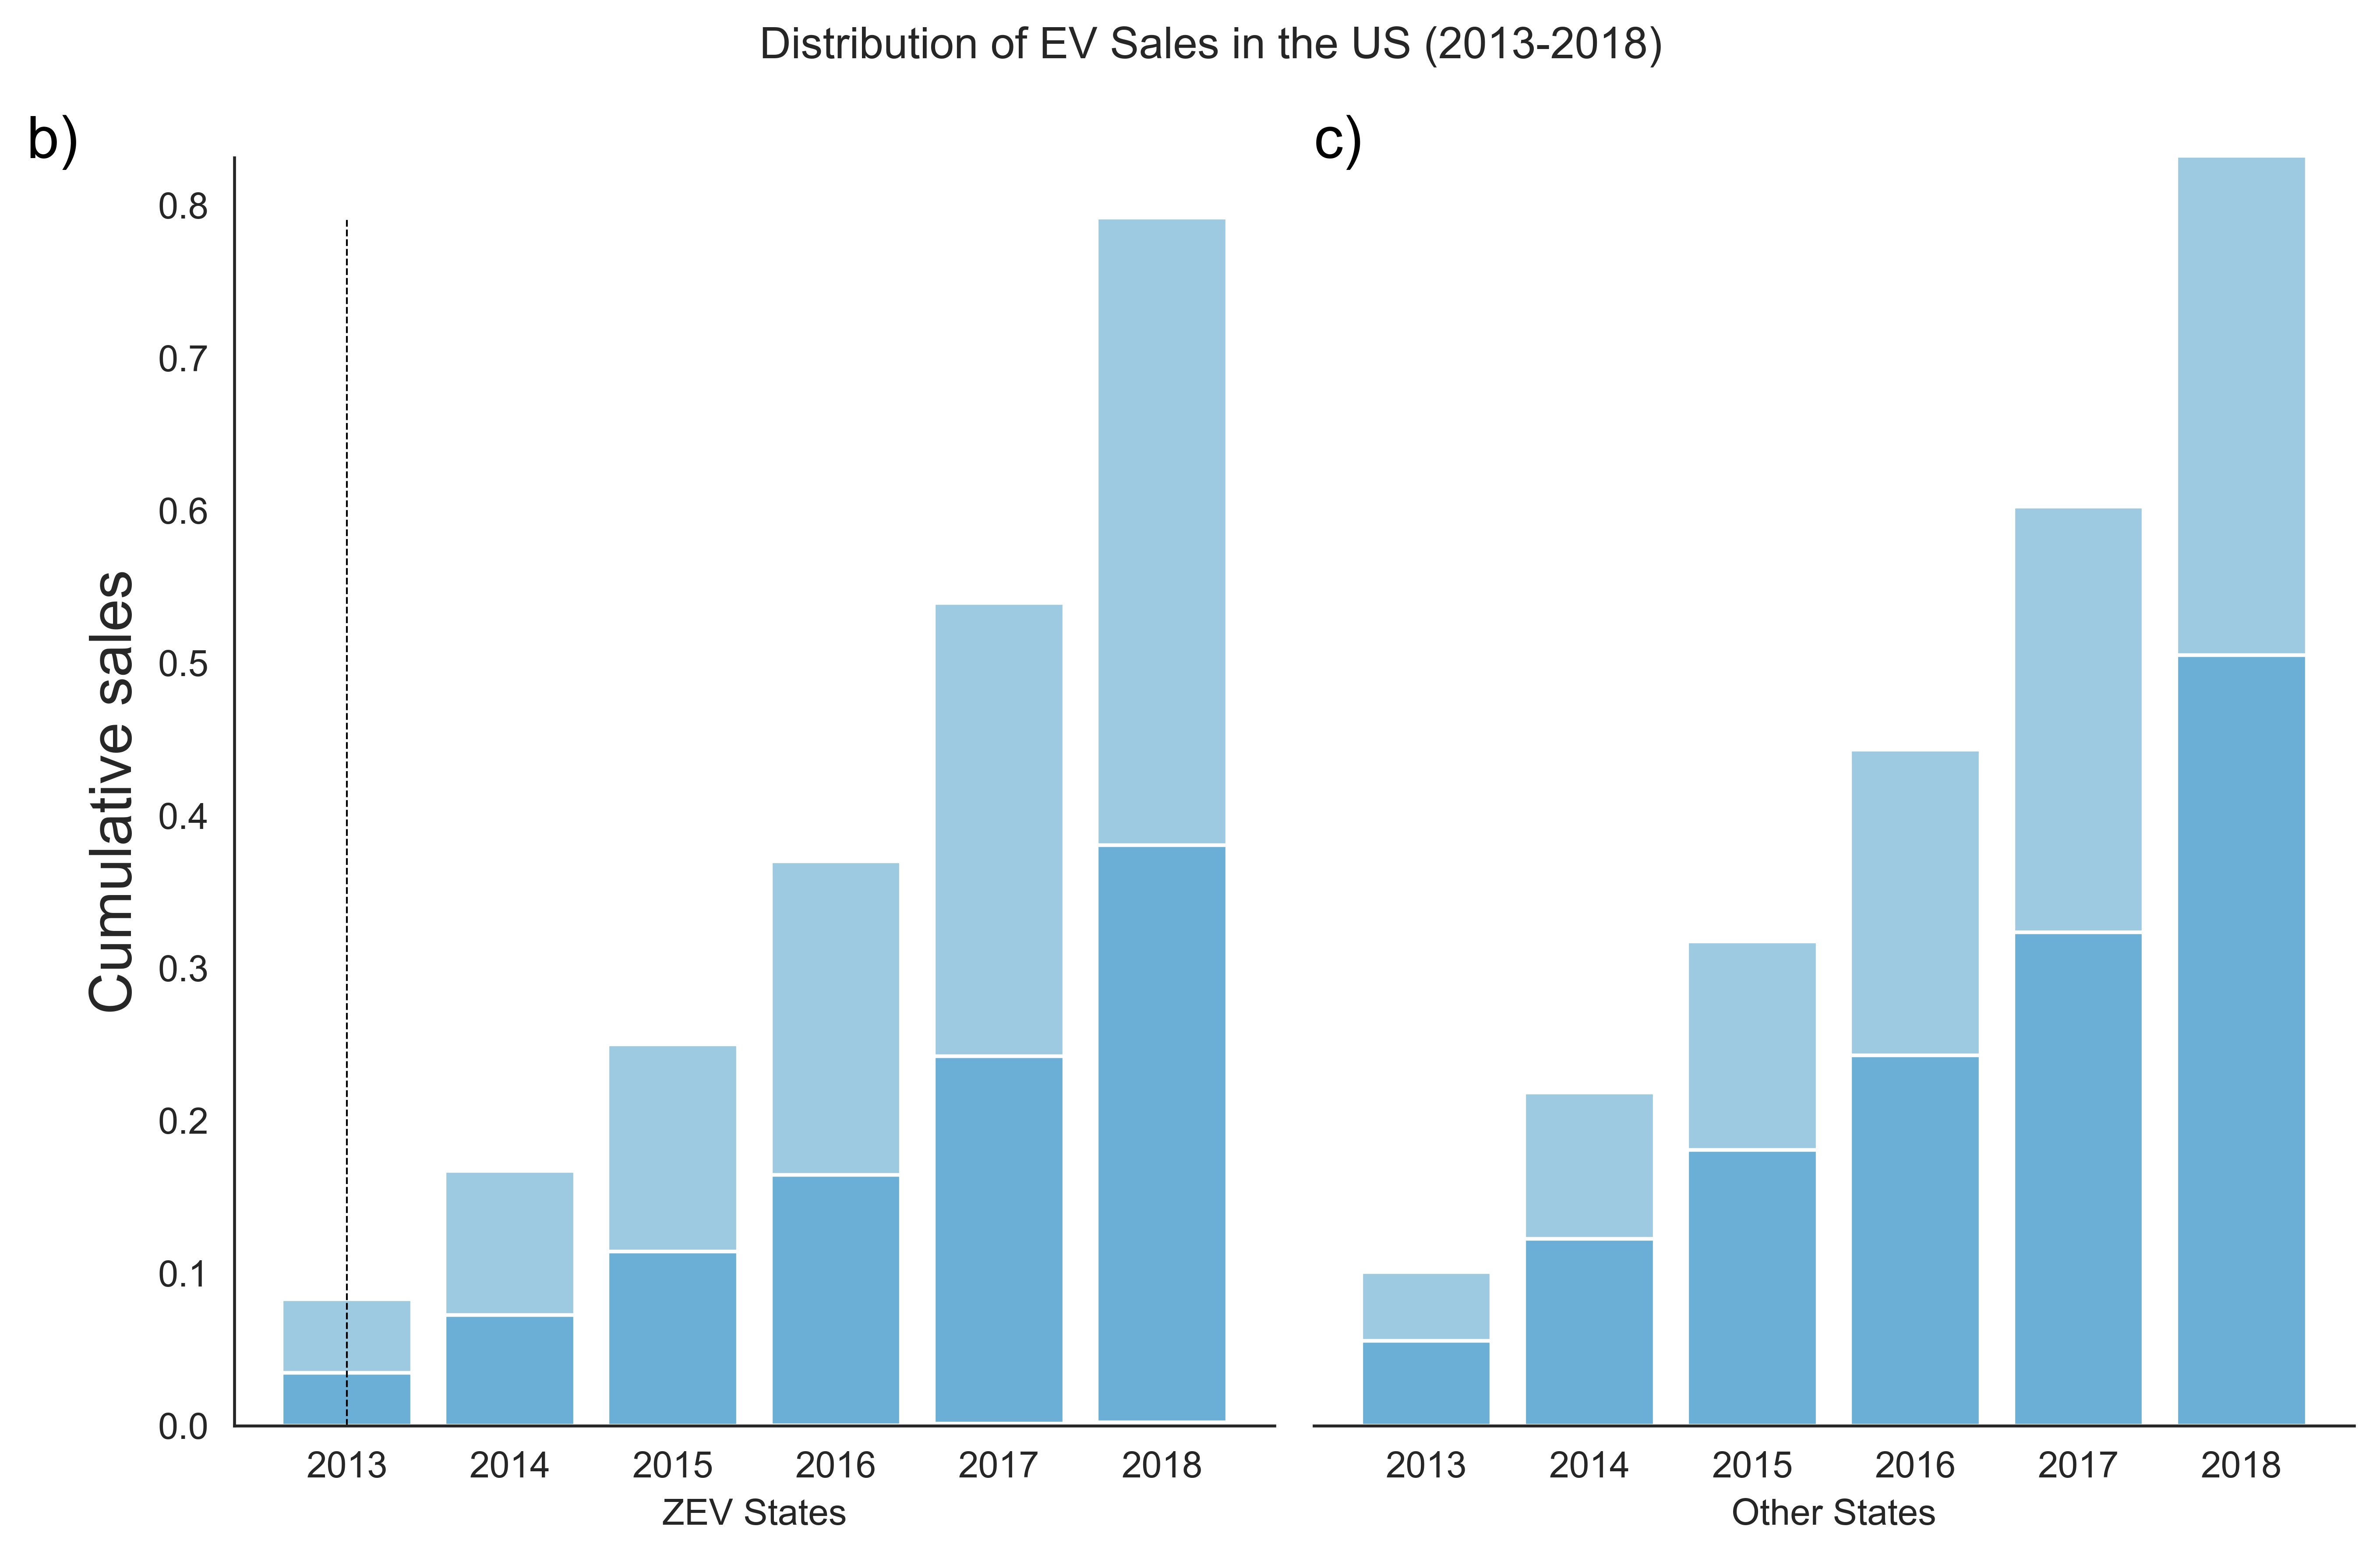

In [15]:
plt.rcParams.update({'font.size': 10})

sns.set_style('white')
cmap = plt.get_cmap('tab20c')

plt.figure(figsize=(9, 6), dpi=600)
gs = gridspec.GridSpec(1, 2)
# #####

# tmdf_carb = pd.read_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "carb_df_zev_sales", start_year, end_year))
# tmdf_noncarb = pd.read_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "noncarb_df_zev_sales", start_year, end_year))

# ax = plt.subplot(gs[0, :])
# ax.text(-0.1, 1, "a)", transform=ax.transAxes, size=16, color='black')

# label = ['ZEV States', 'Other States']
# fcev_sales = [tmdf_carb['FCEV Sales'].sum(), tmdf_noncarb['FCEV Sales'].sum()]
# bev_sales = [tmdf_carb['BEV Sales'].sum(), tmdf_noncarb['BEV Sales'].sum()]
# phev_sales = [tmdf_carb['PHEV Sales'].sum(), tmdf_noncarb['PHEV Sales'].sum()]
# y1 = fcev_sales[0] + bev_sales[0] + phev_sales[0]
# y2 = fcev_sales[1] + bev_sales[1] + phev_sales[1]

# ax.ticklabel_format(style='plain')

# ax.text(-0.05, y1, "{:.2f}%".format(tmdf_carb['us_percent'].sum())) 
# ax.text(0.95, y2, "{:.2f}%".format(tmdf_noncarb['us_percent'].sum())) 

# plt.bar(label, fcev_sales, label = 'FCEV Sales', color = cmap(0))
# plt.bar(label, bev_sales, bottom = fcev_sales, label = 'BEV Sales', color = cmap(1))
# plt.bar(label, phev_sales, bottom = [i+j for i, j in zip(fcev_sales, bev_sales)], label='PHEV Sales', color = cmap(2))
# plt.legend(loc='upper right')
# plt.ylabel("EV sales", size=16)
# sns.despine()

######
ax = plt.subplot(gs[0, 0])
ax.text(-0.2, 1, "b)", transform=ax.transAxes, size=16, color='black')
ax.ticklabel_format(style='plain')

label = plot_df_carb['year'].tolist()
fcev_sales = np.cumsum(plot_df_carb['FCEV Market Share'].tolist())
bev_sales = np.cumsum(plot_df_carb['BEV Market Share'].tolist())
phev_sales = np.cumsum(plot_df_carb['PHEV Market Share'].tolist())

maxy = max(np.cumsum(plot_df_carb['ev_market_share']))

plt.bar(label, fcev_sales, color = cmap(0), label = 'FCEV Market Share')
plt.bar(label, bev_sales, bottom = fcev_sales, color = cmap(1), label = 'BEV Market Share')
plt.bar(label, phev_sales, bottom = [i+j for i, j in zip(fcev_sales, bev_sales)], color = cmap(2), label = 'PHEV Market Share')

# plt.legend(loc='upper left')
plt.vlines(label.index('2013'), 0, maxy, linestyles='dashed', linewidth=0.5, color='k')
# plt.vlines(label.index('2018'), 0, maxy, linestyles='dashed', linewidth=0.5, color='k')
# plt.vlines(label.index('2019'), 0, maxy, linestyles='dashed', linewidth=0.5, color='k')
plt.xlabel('ZEV States')
plt.ylabel("Cumulative sales", size=16)
sns.despine()

#########
ax = plt.subplot(gs[0, 1])
ax.text(0, 1, "c)", transform=ax.transAxes, size=16, color='black')
ax.ticklabel_format(style='plain')

label = plot_df_carb['year'].tolist()
fcev_sales = np.cumsum(plot_df_noncarb['FCEV Market Share'].tolist())
bev_sales = np.cumsum(plot_df_noncarb['BEV Market Share'].tolist())
phev_sales = np.cumsum(plot_df_noncarb['PHEV Market Share'].tolist())

# maxy = max(np.cumsum(plot_df_noncarb['ev_sales']))

plt.bar(label, fcev_sales, color = cmap(0), label = 'FCEV Market Share')
plt.bar(label, bev_sales, bottom = fcev_sales, color = cmap(1), label = 'BEV Market Share')
plt.bar(label, phev_sales, bottom = [i+j for i, j in zip(fcev_sales, bev_sales)], color = cmap(2), label = 'PHEV Market Share')

ax.get_yaxis().set_visible(False)
ax.get_yaxis().set_ticks([])
# plt.legend(loc='upper left')
# plt.ylabel("Electric vehicle sales", size=16)
sns.despine()
ax.spines['left'].set_visible(False)
plt.xlabel('Other States')

plt.ylim(0, maxy)
plt.suptitle("Distribution of EV Sales in the US ({}-{})".format(start_year, end_year-1))
plt.tight_layout()

plt.savefig("{}/{}_{}_{}.png".format(OUTPUT_IMAGE, "zev_market_share", start_year, end_year), bbox_inches='tight')
plt.show()

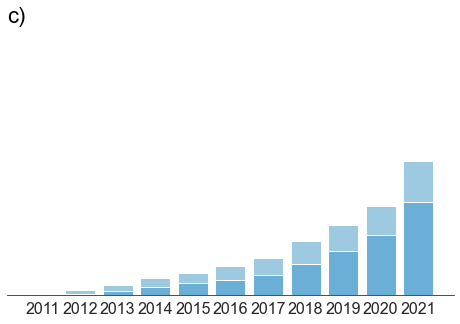

In [15]:
plt.rcParams.update({'font.size': 16})

sns.set_style('white')
cmap = plt.get_cmap('tab20c')

fig, ax = plt.subplots(figsize=(8,5))
ax.text(0, 1, "c)", transform=ax.transAxes, size=22, color='black')
ax.ticklabel_format(style='plain')

label = plot_df_carb['year'].tolist()
fcev_sales = np.cumsum(plot_df_noncarb['FCEV Sales'].tolist())
bev_sales = np.cumsum(plot_df_noncarb['BEV Sales'].tolist())
phev_sales = np.cumsum(plot_df_noncarb['PHEV Sales'].tolist())

# maxy = max(np.cumsum(plot_df_noncarb['ev_sales']))

plt.bar(label, fcev_sales, color = cmap(0), label = 'FCEV Sales')
plt.bar(label, bev_sales, bottom = fcev_sales, color = cmap(1), label = 'BEV Sales')
plt.bar(label, phev_sales, bottom = [i+j for i, j in zip(fcev_sales, bev_sales)], color = cmap(2), label = 'PHEV Sales')

ax.get_yaxis().set_visible(False)
ax.get_yaxis().set_ticks([])
# plt.legend(loc='upper left')
# plt.ylabel("Electric vehicle sales", size=16)
sns.despine()
ax.spines['left'].set_visible(False)

plt.ylim(0, maxy)
plt.savefig("{}/{}.png".format(OUTPUT_IMAGE, "zev_sales_c"), bbox_inches='tight')
plt.show()

In [16]:
epa_region[epa_region['State Code'].isin(EXCLUDE_STATES)]

,State Name,State Code,EPA Region
102,Arizona,4,9
250,Colorado,8,8
322,Delaware,10,3
325,District Of Columbia,11,3
1322,Minnesota,27,5
1805,New Mexico,35,6
2254,Pennsylvania,42,3
2966,Washington,53,10


In [17]:
epa_region[epa_region['State Name'] == 'Minnesota']

,State Name,State Code,EPA Region
1322,Minnesota,27,5


In [18]:
mdf_carb

,State,FCEV Sales,BEV Sales,PHEV Sales,year,State Name,State Code,EPA Region,ev_sales,us_percent
4,California,19,5062,1656,2011,California,6.0,9.0,6737,41.4891
6,Connecticut,0,8,103,2011,Connecticut,9.0,1.0,111,0.683582
19,Maine,0,0,17,2011,Maine,23.0,1.0,17,0.104693
20,Maryland,0,80,199,2011,Maryland,24.0,3.0,279,1.718192
21,Massachusetts,0,7,107,2011,Massachusetts,25.0,1.0,114,0.702057
...,...,...,...,...,...,...,...,...,...,...
550,New Jersey,0,19773,6219,2021,New Jersey,34.0,2.0,25992,160.068974
552,New York,0,21141,14366,2021,New York,36.0,2.0,35507,218.666092
557,Oregon,0,8380,4421,2021,Oregon,41.0,10.0,12801,78.8336
559,Rhode Island,0,944,737,2021,Rhode Island,44.0,1.0,1681,10.35226
